In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import requests

r = 'https://api-pub.bitfinex.com/v2/book/tBTCUSD/P2'

response = requests.get(r, params={'len': 100})
df = pd.DataFrame(response.json(), columns=['price', 'count', 'amount'])
df

,price,count,amount
0,30600,87,44.733005
1,30500,100,211.672096
2,30400,54,92.209931
3,30300,50,55.767454
4,30200,63,22.188831
...,...,...,...
195,40200,20,-0.352855
196,40300,19,-0.400238
197,40400,25,-0.381961
198,40500,29,-0.398802


In [3]:
bid = df[df['amount'] > 0]
ask = df[df['amount'] < 0]

<AxesSubplot:xlabel='amount', ylabel='price'>

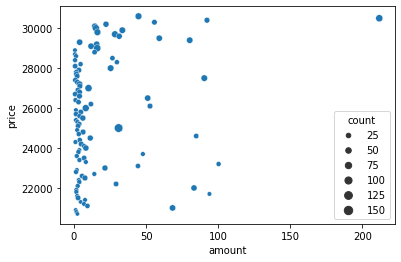

In [4]:
sns.scatterplot(y=bid['price'], x=bid['amount'], size=bid['count'])

<AxesSubplot:xlabel='amount', ylabel='price'>

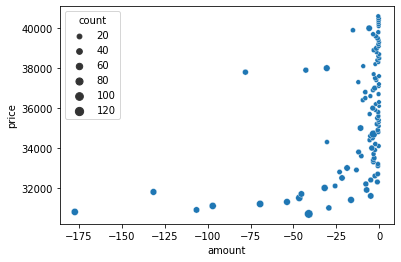

In [5]:
sns.scatterplot(y=ask['price'], x=ask['amount'], size=ask['count'])

## P3

In [12]:
import requests

r = 'https://api-pub.bitfinex.com/v2/book/tBTCUSD/P3'

response = requests.get(r, params={'len': 100})
df = pd.DataFrame(response.json(), columns=['price', 'count', 'amount'])
bid = df[df['amount'] > 0]
ask = df[df['amount'] < 0]

<AxesSubplot:xlabel='amount', ylabel='price'>

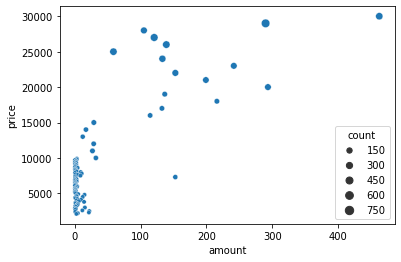

In [13]:
sns.scatterplot(y=bid['price'], x=bid['amount'], size=bid['count'])

<AxesSubplot:xlabel='amount', ylabel='price'>

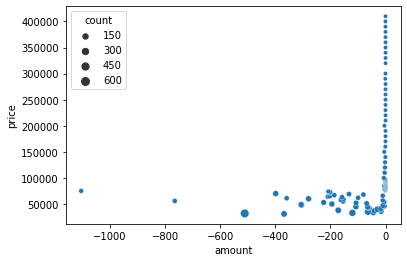

In [14]:
sns.scatterplot(y=ask['price'], x=ask['amount'], size=ask['count'])